In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

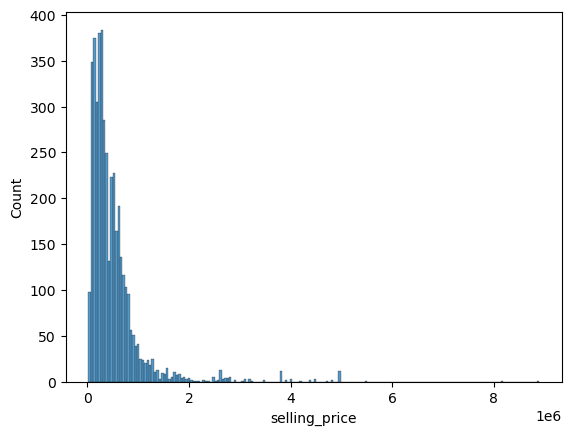

In [7]:
sns.histplot(df["selling_price"])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


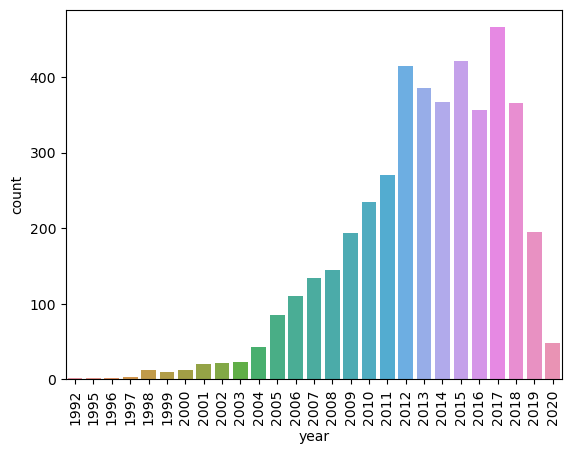

In [8]:
sns.countplot(df["year"])
plt.xticks(rotation=90)
plt.show()

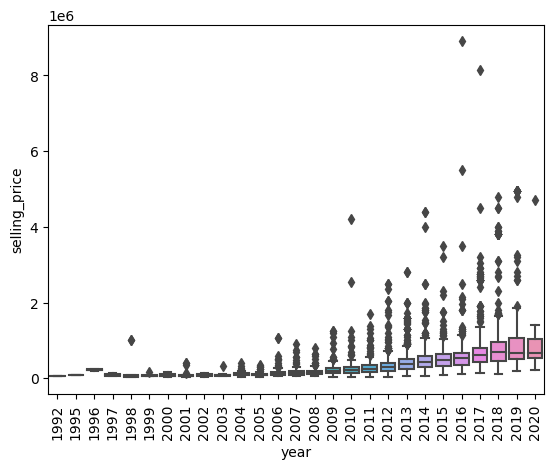

In [9]:
sns.boxplot(x="year",y="selling_price",data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

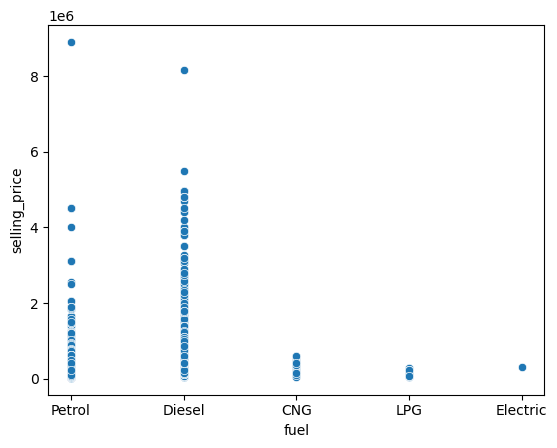

In [10]:
sns.scatterplot(x="fuel",y="selling_price",data=df)

<AxesSubplot:>

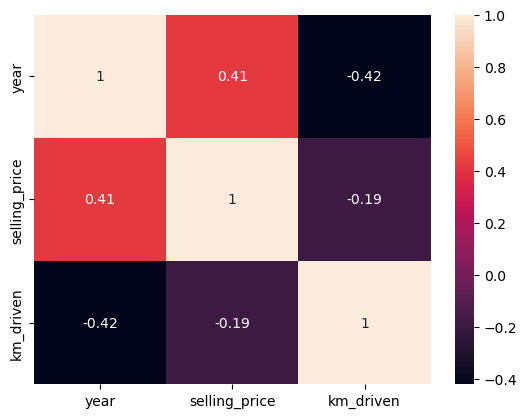

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
df["owner"].unique()   

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
df[["km_driven"]]=scaler.fit_transform(df[["km_driven"]])

In [17]:
df[["km_driven"]]

,km_driven
0,0.081139
1,-0.347689
2,0.724381
3,-0.433455
4,1.603479
...,...
4335,0.295553
4336,0.295553
4337,0.359877
4338,0.509967


In [18]:
df["fuel"]=encoder.fit_transform(df["fuel"])


In [19]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [20]:
df["transmission"].unique()   

array(['Manual', 'Automatic'], dtype=object)

In [21]:
df["seller_type"]=encoder.fit_transform(df["seller_type"])

In [22]:
df["transmission"]=encoder.fit_transform(df["transmission"]) 

In [23]:
df["owner"]=encoder.fit_transform(df["owner"]) 

In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,0.081139,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,-0.347689,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,0.724381,1,1,1,0
3,Datsun RediGO T Option,2017,250000,-0.433455,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,1.603479,1,1,1,2


In [25]:
x=df.drop(["selling_price","name"],axis=1)
y=df["selling_price"]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [27]:
print(f"x train shape: {x_train.shape}")
print(f"x test shape: {x_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")


x train shape: (3255, 6)
x test shape: (1085, 6)
y train shape: (3255,)
y test shape: (1085,)


In [28]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
ans1 = model1.predict(x_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,ans1)
print(score*100)


20.829493087557605


In [29]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train,y_train)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model2.score(x_test,y_test)

0.03870967741935484

In [31]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(x_train,y_train)

model3.score(x_test,y_test)

0.5087052219138901

In [32]:
from sklearn.neighbors import KNeighborsRegressor

model4 = KNeighborsRegressor()
model4.fit(x_train,y_train)

model4.score(x_test,y_test)

0.48145228099951076

In [33]:
from sklearn.svm import SVC

model5 = SVC()
model5.fit(x_train,y_train)

model5.score(x_test,y_test)

0.034101382488479264

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

model6 = GradientBoostingRegressor()
model6.fit(x_train,y_train)

model6.score(x_test,y_test)

0.5045268199397811

In [35]:
from sklearn.linear_model import SGDRegressor

model7 = SGDRegressor()
model7.fit(x_train,y_train)

model7.score(x_test,y_test)

-8.352685337116276e+18

# predictive system

In [37]:
year = int(input("Enter the year: ")) 
km_driven = int(input("Enter the kilometers driven: "))
fuel=int(input("Enter the fuel type [CNG-0,Diesel-1,Electric-2,LPG-3,Petrol-4]: "))
seller_type = int(input("Enter seller type [Dealer-0,Individual-1,Trustmark Dealer-2]: "))
transmisson = int(input("Enter the transmission type [Automatic-0,Manual-1]: "))
owner = int(input("Enter the owner type [First Owner-0,Fourth & Above Owner-1,Second Owner-2,Test Drive Car-3,Third Owner-4]: "))
selling_price = [year,km_driven,fuel,seller_type,transmisson,owner]
selling_price = model6.predict([selling_price])
print("Predicted Selling Price of car is: ",int(selling_price))

Enter the year: 2023
Enter the kilometers driven: 60000
Enter the fuel type [CNG-0,Diesel-1,Electric-2,LPG-3,Petrol-4]: 3
Enter seller type [Dealer-0,Individual-1,Trustmark Dealer-2]: 4
Enter the transmission type [Automatic-0,Manual-1]: 1
Enter the owner type [First Owner-0,Fourth & Above Owner-1,Second Owner-2,Test Drive Car-3,Third Owner-4]: 2
Predicted Selling Price of car is:  164576


C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
